In [214]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [215]:
# prepare the data
X = np.array(
    [
        [2., 2.1, 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0],
        [4.4,5.5, 5.3, 5.7, 6. , 6.5, 7.,  7.4, 7.8 ,8.5]
    ]   
)
y = np.array([ 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
X.shape

(2, 10)

In [216]:
rand_coef = np.random.random(10)
X_new = np.array(
    [
        X[0] + rand_coef,
        X[1] + rand_coef 
    ])
X_new

# test = np.random.random(10)
# test

array([[2.49493489, 2.80571223, 2.81607902, 3.25817134, 3.4146633 ,
        2.70680958, 3.10405495, 2.85391393, 3.45702498, 3.9365784 ],
       [4.89493489, 6.20571223, 5.91607902, 6.65817134, 6.9146633 ,
        6.60680958, 7.40405495, 7.45391393, 8.35702498, 9.4365784 ]])

In [217]:
# plt.scatter(X[0,:],X[1,:], color="red")
# plt.scatter(X_new[0,:],X_new[1,:], color="green")

X_real_0 = np.append(X[0], X_new[0])
X_real_1 = np.append(X[1], X_new[1])
X_data = np.array([X_real_0, X_real_1])

y = np.append(np.zeros(18), np.ones(2))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1.])

In [218]:
colors = ["red", "green"]

In [219]:
colors_map = ["red", "green"]


# if-else statment like expression with logical operators used as short circuit 
colors = map(lambda el:el and "green" or "red", y)

# if-else statment like expression with if-else expression
# colors = list(map(el: "green"  if el else "red", y))
colors = list(colors)

colors

['red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green']

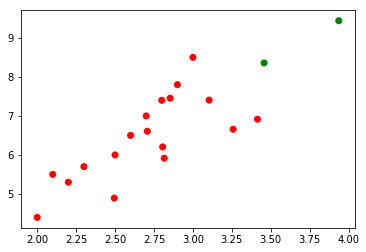

In [220]:
plt.scatter(X_data[0,:],X_data[1,:], color=colors)

In [224]:
# test with SVM
from sklearn import svm
from sklearn import dummy

clf = svm.SVC(gamma="auto")
# clf = dummy.DummyClassifier()
clf.fit(X_data.T, y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [225]:
# test on same data
X_test = X_data.T

y_pred = clf.predict(X_test)

In [226]:
# evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.95